# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Full Name: SAI SANDEEP GOTTIPATI

ID:1001944726

Team Mate name :SREYA KOTHA

ID:1002007076

## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is required for this assignment. Still you need to comment your code. (-10 for no comments in the code.)
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is given as 2 files(clustering.csv and college.csv).<br>
Output variable for clustering.csv - Class (<=50K and >50K)<br>
Output variable for college.csv - Grad.Rate (<=50 and >50k)<br>

You need to submit this ipython file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

## Required Python Packages 

# Import required Python packages here
# Seaborn,numpy,pandas,sklearn,matplotlib only
-20 points for the use of libraries other than the above mentioned

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

# Preprocessing the Clusteringdataset.csv

In [2]:
df=pd.read_csv('clusteringdata.csv')# reading the clusteringdataset.csv

df=df.drop('CapitalGain',axis=1) #dropping the Capital Gain attribute 
df=df.drop('CapitalLoss',axis=1) #dropping the capital Loss attribute 
le=LabelEncoder()
df['WorkClass']=le.fit_transform(df['WorkClass'])
df['Education']=le.fit_transform(df['Education'])
df['Occupation']=le.fit_transform(df['Occupation'])
df['Relationship']=le.fit_transform(df['Relationship'])
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])
df['Race']=le.fit_transform(df['Race'])
df['NativeCountry']=le.fit_transform(df['NativeCountry'])
df['Class']=le.fit_transform(df['Class'])
df['Sex']=le.fit_transform(df['Sex'])
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              5000 non-null   int64
 1   WorkClass        5000 non-null   int64
 2   Fnlwght          5000 non-null   int64
 3   Education        5000 non-null   int64
 4   EducationNumber  5000 non-null   int64
 5   MaritalStatus    5000 non-null   int64
 6   Occupation       5000 non-null   int64
 7   Relationship     5000 non-null   int64
 8   Race             5000 non-null   int64
 9   Sex              5000 non-null   int64
 10  HoursPerWeek     5000 non-null   int64
 11  NativeCountry    5000 non-null   int64
 12  Class            5000 non-null   int64
dtypes: int64(13)
memory usage: 507.9 KB


# Task 1A

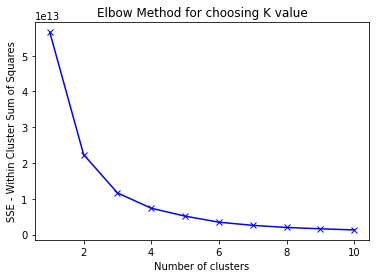

The best value from the above graph is : 2


In [3]:
#########################begin code for Task 1-a
SSE=[] # sum of squares is declared
#in this we are calculating the values of K from 1 to 11 using Kmeans algorithm and chaning the cluster size.
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++',max_iter=300,n_init=10,random_state=0);
    kmeans.fit_predict(df)
    SSE.append(kmeans.inertia_)
# plotting the curve betweeen the number of clusters and the SSE 
plt.plot(range(1,11),SSE,'bx-')
plt.title('Elbow Method for choosing K value')
plt.xlabel('Number of clusters')
plt.ylabel('SSE - Within Cluster Sum of Squares')
plt.show()
print("The best value of K from the above graph is :",2)
# the best value for K is 2 from the below graph..
########################begin code for Task 1-a


### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



# Splitting the dataset for Training and Testing 

In [6]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing
# random state = 2022
### Important!!!
#determining the X attributes from the given dataset. 
X=df.loc[:, ['Age', 'WorkClass','Fnlwght','Education','EducationNumber','MaritalStatus',
             'Occupation' ,'Relationship' ,'Race','Sex','HoursPerWeek','NativeCountry']]
#determining the output variable 
y_class=df.loc[:,['Class']]
print(X.shape); #checking the shape fo the dataset.
#splitting the test and train dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.30,random_state=2022)
print(X_test.shape) #printing the X_test.shape to get the shape of X
print(X_train.shape)
##################end code for Task 1-b-1

(5000, 12)
(1500, 12)
(3500, 12)


# Visualization for the Predicted Training vs Actual Training labels

Text(0.5, 1.0, 'Actual Training Labels')

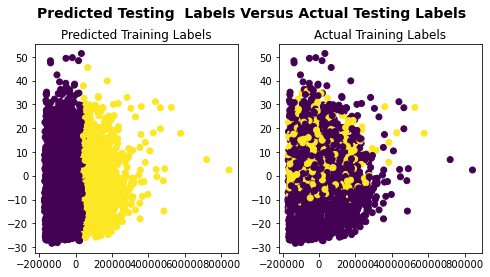

In [17]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA


# Create the KMeans model
kmeans=KMeans(n_clusters=2);
kmeans.fit(X_train)

# Compute cluster centers and predict cluster index for each sample 
means=kmeans.cluster_centers_
y_pred=kmeans.predict(X_train)
training_set_predictions=pd.DataFrame(y_train.values,columns=['Actual_Values'])
training_set_predictions["predicted_values"]=y_pred
# Model and fit the data to the PCA model
pca=PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]




# Add scatterplots to the subplots 

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Testing  Labels Versus Actual Testing Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(x, y, c=y_pred)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(x, y, c=y_train["Class"].values)
ax[1].set_title('Actual Training Labels')
###################end code for Task 1-b-2


Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

Text(0.5, 1.0, 'Actual Training Labels')

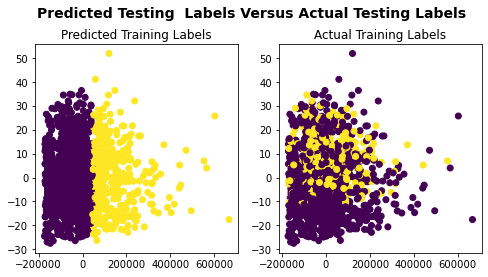

In [16]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels



# predict cluster index for each sample 

# Model and fit the data to the PCA model

pca = PCA(n_components=2)
X_test_pca = pca.fit_transform((X_test))
predicted_test_labels=kmeans.fit_predict(X_test_pca)

x = X_test_pca[:, 0]
y = X_test_pca[:, 1]
# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Testing  Labels Versus Actual Testing Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(x, y, c=predicted_test_labels)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(x, y, c=y_test.values)
ax[1].set_title('Actual Training Labels')

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)

###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

[[845 302]
 [251 102]]


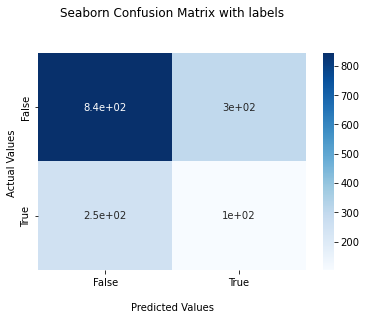

In [9]:
###################begin code for Task 1-b-4: Print out a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns 

pred=kmeans.fit_predict(X_test)
cf=confusion_matrix(y_test,pred)
print(cf)
ax=sns.heatmap(cf,annot=True,cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
###################end code for Task 1-b-4

# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [11]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score

## Calculate pairwise distance matrix for X_train
pdm_train = pairwise_distances(X_train)
## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine

complete_cosine_model = AgglomerativeClustering(linkage="complete", affinity="cosine", n_clusters=2)
complete_cosine_model.fit(pdm_train)    
score_cosine_complete=f1_score(y_train.values, complete_cosine_model.fit_predict(X_train.values))
## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
complete_eucledian_model=AgglomerativeClustering(n_clusters=2, linkage="complete", affinity="euclidean")
complete_eucledian_model.fit(pdm_train)
score_eculedian_complete=f1_score(y_train.values, complete_eucledian_model.fit_predict(X_train.values))
## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
complete_manhattan_model=AgglomerativeClustering(n_clusters=2, linkage="complete", affinity="manhattan")
complete_manhattan_model.fit(pdm_train)
score_manhattan_complete=f1_score(y_train.values, complete_manhattan_model.fit_predict(X_train.values))
## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosibrone
average_cosine_model=AgglomerativeClustering(n_clusters=2, linkage="average", affinity="cosine")
average_cosine_model.fit(pdm_train)
score_cosine_average=f1_score(y_train.values, average_cosine_model.fit_predict(X_train.values))
## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
average_eucledian_model=AgglomerativeClustering(n_clusters=2, linkage="average", affinity="euclidean")
average_eucledian_model.fit(pdm_train)
score_eucledian_average=f1_score(y_train.values, average_eucledian_model.fit_predict(X_train.values))
## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
average_manhattan_model=AgglomerativeClustering(n_clusters=2, linkage="average", affinity="manhattan")
average_manhattan_model.fit(pdm_train)
score_manhattan_average=f1_score(y_train.values, average_manhattan_model.fit_predict(X_train.values))

print("F1-score for complete linkage + cosine", score_cosine_complete)
print("F1-score for complete linkage + euclidean", score_eculedian_complete)
print("F1-score for complete linkage + manhattan", score_manhattan_complete)
print("F1-score for average linkage + cosine",score_cosine_average )
print("F1-score for average linkage + euclidean", score_eucledian_average)
print("F1-score for average linkage + manhattan", score_manhattan_average)

###################end code for Task 2-a

/Users/sandeepgottipati/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
/Users/sandeepgottipati/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
/Users/sandeepgottipati/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
/Users/sandeepgottipati/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/

F1-score for complete linkage + cosine 0.3927660561094366
F1-score for complete linkage + euclidean 0.3949471513276618
F1-score for complete linkage + manhattan 0.01340782122905028
F1-score for average linkage + cosine 0.002296211251435132
F1-score for average linkage + euclidean 0.39714351531905095
F1-score for average linkage + manhattan 0.39714351531905095


# Confusion matrix visualisation


[[1139    8]
 [ 352    1]]


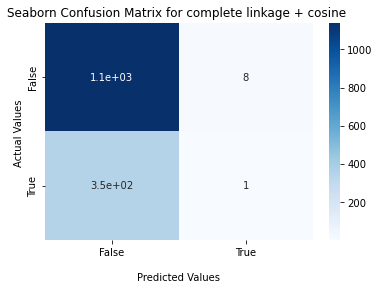

[[1125   22]
 [ 347    6]]


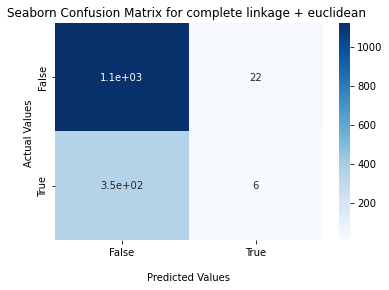

[[ 114 1033]
 [  37  316]]


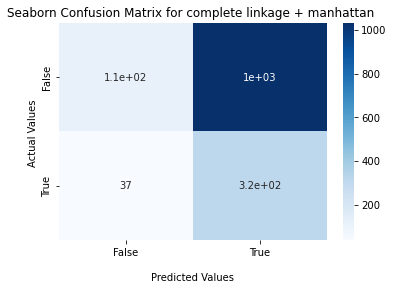

[[1138    9]
 [ 350    3]]


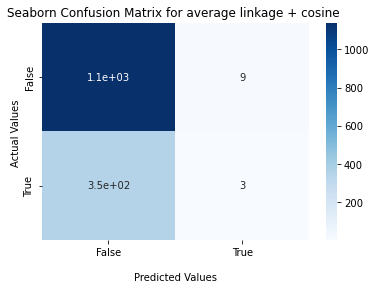

[[  27 1120]
 [   7  346]]


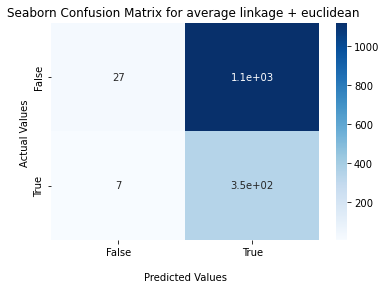

[[  27 1120]
 [   7  346]]


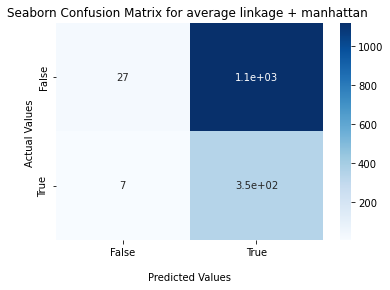

In [12]:
#printing the confusion matrix for complete linkage + cosine

pred1=complete_cosine_model.fit_predict(X_test)
cf1=confusion_matrix(y_test,pred1)
print(cf1)
ax1=sns.heatmap(cf1,annot=True,cmap='Blues')

ax1.set_title('Seaborn Confusion Matrix for complete linkage + cosine ');
ax1.set_xlabel('\nPredicted Values')
ax1.set_ylabel('Actual Values ');
ax1.xaxis.set_ticklabels(['False','True'])
ax1.yaxis.set_ticklabels(['False','True'])
plt.show()
#printing the confusion matrix for complete linkage + euclidean

pred2=complete_eucledian_model.fit_predict(X_test)
cf2=confusion_matrix(y_test,pred2)
print(cf2)
ax1=sns.heatmap(cf2,annot=True,cmap='Blues')

ax1.set_title('Seaborn Confusion Matrix for complete linkage + euclidean ');
ax1.set_xlabel('\nPredicted Values')
ax1.set_ylabel('Actual Values ');
ax1.xaxis.set_ticklabels(['False','True'])
ax1.yaxis.set_ticklabels(['False','True'])
plt.show()

# printing the confusion matrix for complete linkage + manhattan

pred3=complete_manhattan_model.fit_predict(X_test)
cf3=confusion_matrix(y_test,pred3)
print(cf3)
ax1=sns.heatmap(cf3,annot=True,cmap='Blues')

ax1.set_title('Seaborn Confusion Matrix for complete linkage + manhattan ');
ax1.set_xlabel('\nPredicted Values')
ax1.set_ylabel('Actual Values ');
ax1.xaxis.set_ticklabels(['False','True'])
ax1.yaxis.set_ticklabels(['False','True'])
plt.show()

#printing the confusion matrix for average linkage+cosine

pred4=average_cosine_model.fit_predict(X_test)
cf4=confusion_matrix(y_test,pred4)
print(cf4)
ax1=sns.heatmap(cf4,annot=True,cmap='Blues')

ax1.set_title('Seaborn Confusion Matrix for average linkage + cosine ');
ax1.set_xlabel('\nPredicted Values')
ax1.set_ylabel('Actual Values ');
ax1.xaxis.set_ticklabels(['False','True'])
ax1.yaxis.set_ticklabels(['False','True'])
plt.show()

#printing the confusion matrix for average linkage + euclidean
pred5=average_eucledian_model.fit_predict(X_test)
cf5=confusion_matrix(y_test,pred5)
print(cf5)
ax1=sns.heatmap(cf5,annot=True,cmap='Blues')

ax1.set_title('Seaborn Confusion Matrix for average linkage + euclidean ');
ax1.set_xlabel('\nPredicted Values')
ax1.set_ylabel('Actual Values ');
ax1.xaxis.set_ticklabels(['False','True'])
ax1.yaxis.set_ticklabels(['False','True'])
plt.show()
# printing the confusion matrix for average linkage + manhattan

pred6=average_manhattan_model.fit_predict(X_test)
cf6=confusion_matrix(y_test,pred6)
print(cf6)
ax1=sns.heatmap(cf6,annot=True,cmap='Blues')

ax1.set_title('Seaborn Confusion Matrix for average linkage + manhattan ');
ax1.set_xlabel('\nPredicted Values')
ax1.set_ylabel('Actual Values ');
ax1.xaxis.set_ticklabels(['False','True'])
ax1.yaxis.set_ticklabels(['False','True'])
plt.show()

## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

Text(0.5, 1.0, 'Actual Training Labels')

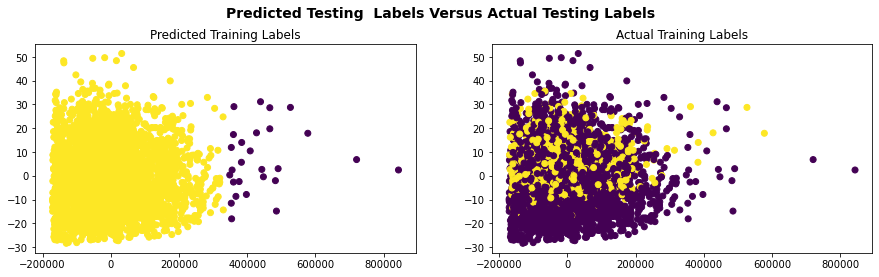

In [23]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels


# Visualize the predicted training labels versus actual training labels. 
# Import PCA


# Model and fit the data to the PCA model

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]




# Add scatterplots to the subplots 




fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# Adjust layout
fig.suptitle('Predicted Testing  Labels Versus Actual Testing Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(x, y, c=average_manhattan_model.fit_predict(X_train.values))
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(x, y, c=y_train["Class"].values)
ax[1].set_title('Actual Training Labels')

###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

/Users/sandeepgottipati/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


Text(0.5, 1.0, 'Actual  Labels')

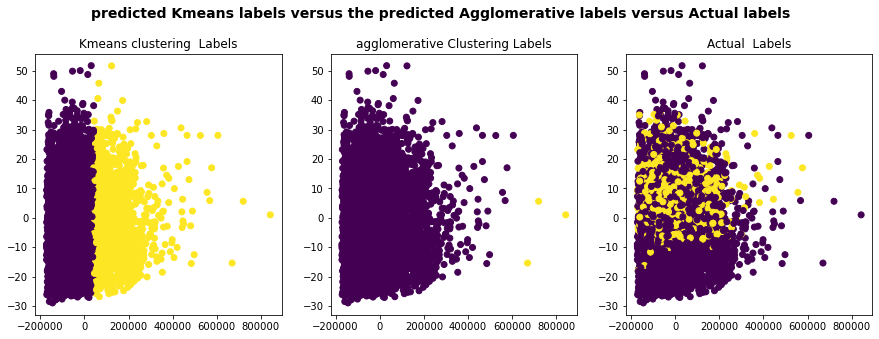

In [19]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
kmeans_model=KMeans(n_clusters=2)

kmeans_model.fit_predict(X)
### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pdmX = pairwise_distances(X)

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)

average_manhattan_model.fit(pdmX)
### Visualize Clusters
#  Model and fit the data to the PCA model
pca=PCA(n_components=2)
X_pca= pca.fit_transform(X)
x = X_pca[:, 0]
y = X_pca[:, 1]

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Adjust layout
fig.suptitle('predicted Kmeans labels versus the predicted Agglomerative labels versus Actual labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(x, y, c=kmeans_model.fit_predict(X.values))
ax[0].set_title('Kmeans clustering  Labels')
ax[1].scatter(x, y, c=average_manhattan_model.fit_predict(X.values))
ax[1].set_title('agglomerative Clustering Labels')
ax[2].scatter(x, y, c=y_class.values)
ax[2].set_title('Actual  Labels')

###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

[[2711 1068]
 [ 927  294]]


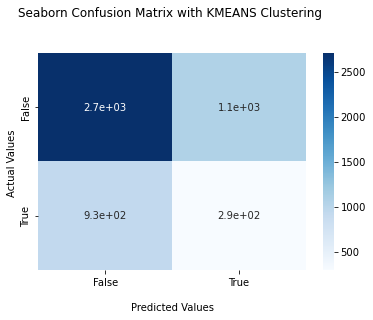

Classification_report for KN
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      3779
           1       0.22      0.24      0.23      1221

    accuracy                           0.60      5000
   macro avg       0.48      0.48      0.48      5000
weighted avg       0.62      0.60      0.61      5000

[[3776    3]
 [1221    0]]


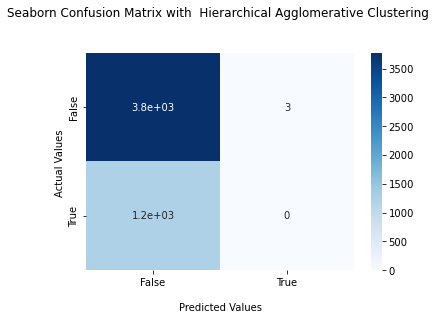

Classification Report for Best Aglomerative Clustering:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3779
           1       0.00      0.00      0.00      1221

    accuracy                           0.76      5000
   macro avg       0.38      0.50      0.43      5000
weighted avg       0.57      0.76      0.65      5000

Justification:

From the above classification report we can see that Agglormerative clustering has high precision score compared to Kmeans clustering 


In [21]:
###################begin code for Task 3-b
#using k-means
from sklearn.metrics import classification_report 
pred7=kmeans.fit_predict(X)
cf7=confusion_matrix(y_class,pred7)
print(cf7)
ax=sns.heatmap(cf7,annot=True,cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with KMEANS Clustering \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
print("Classification_report for KN")
print( classification_report(y_class,pred7))
# confusion matrix for Hierarchical Agglomerative Clustering

pred8=average_manhattan_model.fit_predict(X)
cf8=confusion_matrix(y_class,pred8)
print(cf8)
ax=sns.heatmap(cf8,annot=True,cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with  Hierarchical Agglomerative Clustering \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
print("Classification Report for Best Aglomerative Clustering:")
print( classification_report(y_class,pred8))
print("Justification:\n")
print("From the above classification report we can see that Agglormerative clustering has high precision score compared to Kmeans clustering ")

###################end code for Task 3-b

## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[35 points] Task 1:</b>  

    [10 points] Task 1-a: Determine “k” value from the elbow method

    [25 points] Task 1-b: Visualization for K-Means Clustering

        [02 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [03 points] Task 1-b-4: Print out a confusion matrix
    


<b>[45 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [10 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[15 points] Report :</b> 
Make a 4 min video explaining both the assignment and it's implementation.


 <b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points